# Himalayan Mountaineering Analysis
## CPSC 322
## Fall, 2022
### Jaymin West, Dominic MacIsaac
---------------------------------------------------------

In [5]:
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import eda_utils
importlib.reload(eda_utils)

import matplotlib.pyplot as plt

### Cleaning Data:

### Data Presentation Goals:
1. Summits by peak, year, nation, agency, season
1. Relationship between ratio of hired and summit success
1. Relationship of number of camps and summit success
1. Comparision of climbs with and without oxygen (and O2SLEEP)
1. Camps by peak
1. Camps by peak by agency
1. Camps by season 


<b>Class Distribution! Just total counts summit and not summit<b>

In [2]:
himalaya_table = MyPyTable()
himalaya_table.load_from_file("data/322-Final-Dataset.csv")

# Removing all rows with missing values
himalaya_table.remove_rows_with_missing_values("")

# Converting the SMTMEMBERS row to binary values as this will be 
#   what we use for predictions
himalaya_table.convert_row_to_binary("SUMMIT_SUCCESS", 0.0)
#himalaya_table.pretty_print()
himalaya_table = himalaya_table.combine_boolean_rows("SKI", "PARAPENTE", "TRUE")

In [3]:
def generate_freq_chart(table, col_name, xl, yl, min_value=0):
    temp_dict = eda_utils.get_col_items_count(table, col_name)
    temp_dict = {k:v for k, v in temp_dict.items() if v > min_value}
    eda_utils.make_freq_chart_from_dict(temp_dict, xl, yl)

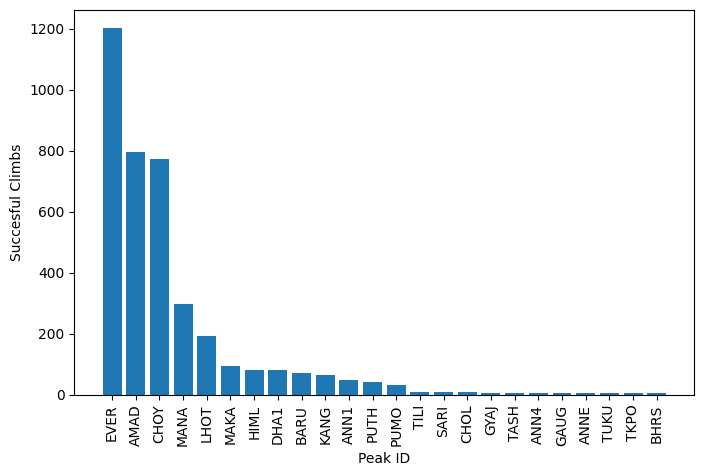

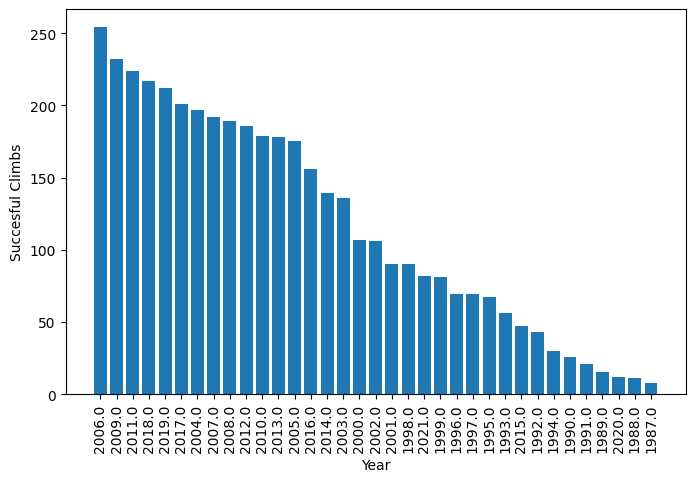

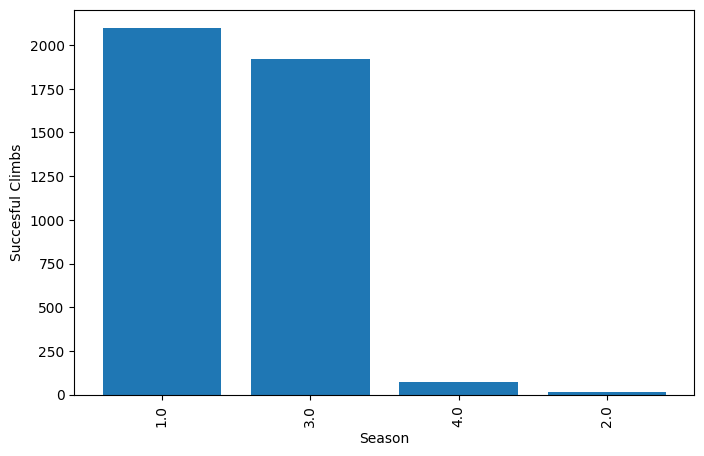

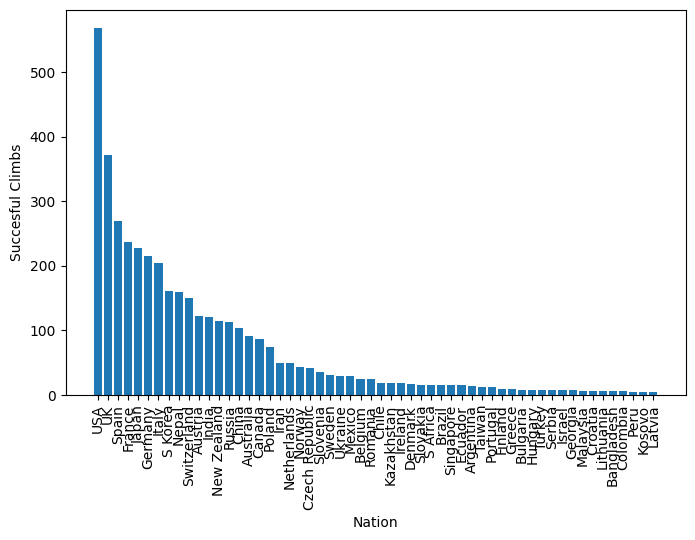

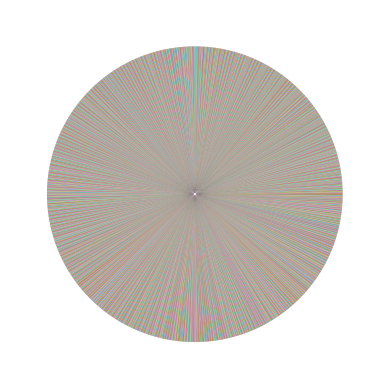

In [7]:
success_table = MyPyTable()
success_table.column_names = himalaya_table.column_names
success_table.data = [row for row in himalaya_table.data if row[-1] == 1]

generate_freq_chart(success_table, "PEAKID", "Peak ID", "Succesful Climbs", 4)
generate_freq_chart(success_table, "YEAR", "Year", "Succesful Climbs", 4)
generate_freq_chart(success_table, "SEASON", "Season", "Succesful Climbs", 4)
generate_freq_chart(success_table, "NATION", "Nation", "Succesful Climbs", 4)


# plt.pie(success_table.get_column("SEASON"))
plt.show()

4104


TypeError: can't multiply sequence by non-int of type 'float'

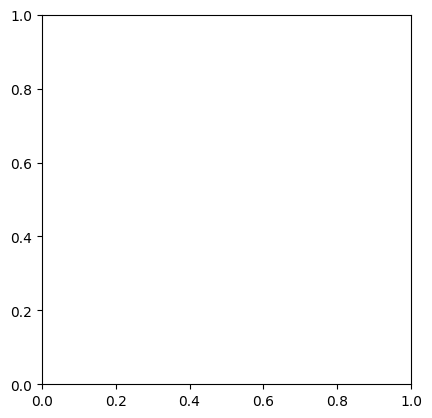

In [25]:
l = success_table.get_column("SEASON")
freq_dict = {item:0 for item in l}

for item in l:
    freq_dict[item] += 1

freq_dict = dict(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))

vals = list(freq_dict.values())

s = sum(vals)
labels = ["Summer - %1.1f%%"%(vals[0] / s *100), "Spring - %1.1f%%"%(vals[1] / s *100), 
            "Autum - %1.1f%%"%(vals[2] / s *100), "Winter - %1.1f%%"%(vals[3] / s *100)]

plt.pie(vals, labels)

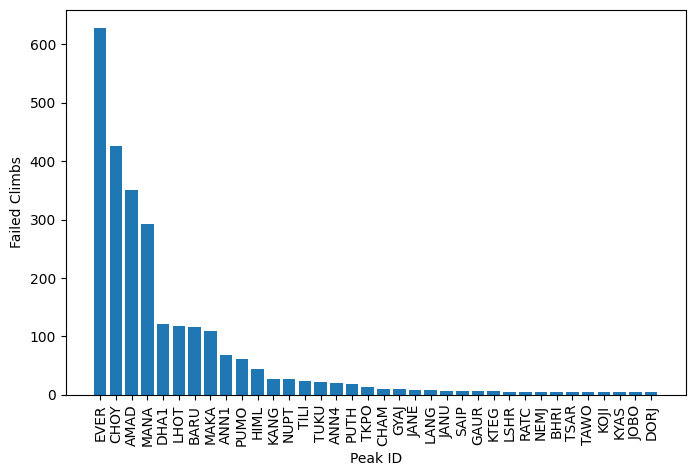

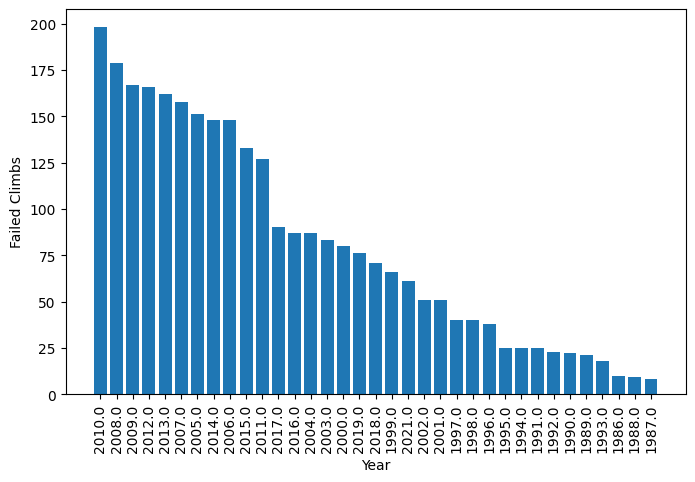

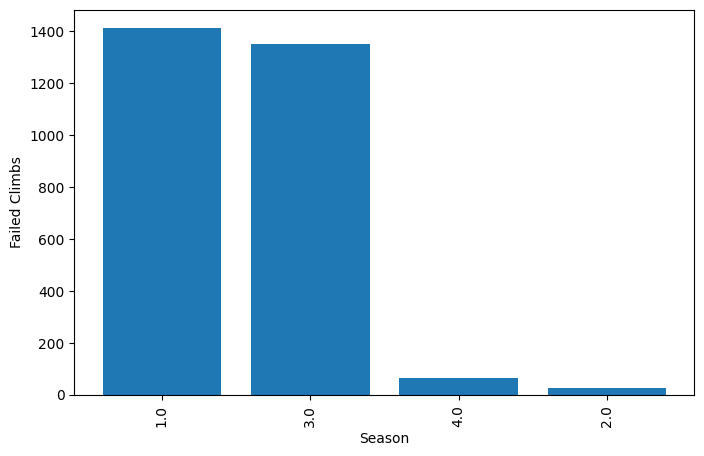

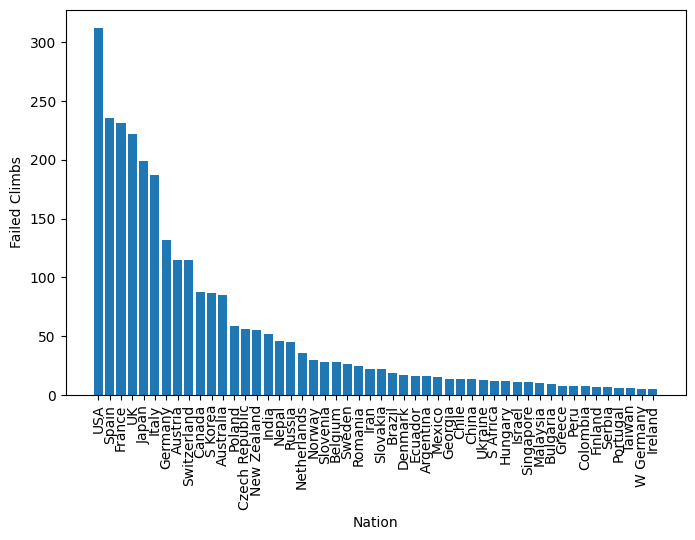

In [ ]:
failure_table = MyPyTable()
failure_table.data = [row for row in himalaya_table.data if row[-1] == 0]
failure_table.column_names = himalaya_table.column_names

generate_freq_chart(failure_table, "PEAKID", "Peak ID", "Failed Climbs", 4)
generate_freq_chart(failure_table, "YEAR", "Year", "Failed Climbs", 4)
generate_freq_chart(failure_table, "SEASON", "Season", "Failed Climbs", 4)
generate_freq_chart(failure_table, "NATION", "Nation", "Failed Climbs", 4)

## Basic Naive Bayes Classifying:

In [ ]:
himalaya_nb_classifier = MyNaiveBayesClassifier()

X_train = [row[:-1] for row in himalaya_table.data]
y_train = [row[-1] for row in himalaya_table.data]

X_test = [row[:-1] for row in himalaya_table.data[100:200]]
y_actual = [row[-1] for row in himalaya_table.data[100:200]]

himalaya_nb_classifier.fit(X_train, y_train)
y_pred = himalaya_nb_classifier.predict(X_test)

acc = myevaluation.accuracy_score(y_actual, y_pred)
f1 = myevaluation.binary_f1_score(y_actual, y_pred, pos_label=1)
precision = myevaluation.binary_precision_score(y_actual, y_pred, pos_label=1)
recall = myevaluation.binary_recall_score(y_actual, y_pred, pos_label=1)

myutils.print_stats("Naive Bayes Results %", [acc, 1-acc, precision, recall, f1])



Naive Bayes Results %
Accuracy:  0.75
Error Rate:  0.25
Precision:  0.0
Recall:  0.0
F1 Score:  0.0
